In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.optim as optim
from torch.nn.functional import binary_cross_entropy_with_logits 
from torch.utils.data import DataLoader
import torchvision
from torchvision.transforms import Normalize,Compose,ToTensor
from torchvision.datasets import ImageFolder

import numpy as np
import matplotlib.pyplot as plt

from Networks import DCGenerator, Discriminator,SythesisNetwork
from data_handler import CelebaDataset
from Trainer import Trainer
from NetBlocks import SynthBlock

In [2]:
batch_size = 128
n_epochs = 150
latent_dim = 256

In [3]:
dataset = CelebaDataset()
print(len(dataset))
loader = DataLoader(dataset,batch_size = batch_size,shuffle=True )

60667


torch.Size([3, 64, 64])


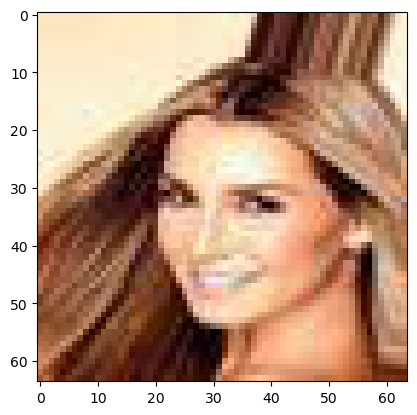

In [4]:
img = dataset[0]
print(img.shape)
img = dataset.un_normalize(img)

plt.imshow(img.permute(1,2,0).detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


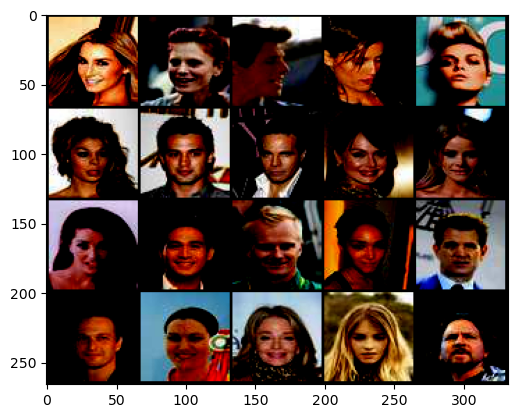

In [5]:
imgs = dataset[:20]
imgs = [im for im in imgs ]
imgs = torchvision.utils.make_grid(imgs,nrow = 5).permute(1,2,0)
plt.imshow(imgs)

In [6]:
generator = DCGenerator(
    latent_size=latent_dim,use_dropout=True
    )
generator.to("cuda")
discriminator = Discriminator()
discriminator.to("cuda")

Discriminator(
  (lrelu): LeakyReLU(negative_slope=0.2, inplace=True)
  (layer1): convBlock(
    (conv): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer2): convBlock(
    (conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer3): convBlock(
    (conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): LeakyReLU(negative_slope=0.2, inplace=True)
  )
  (layer4): convBlock(
    (conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=Fa

In [7]:
generator_optim = optim.Adam(
    generator.parameters(),
    lr = 2e-4,betas = (0.5,0.999)
)
discriminator_optim = optim.Adam(
    discriminator.parameters(),
    lr = 2e-4,betas = (0.5,0.999)
)

In [8]:
trainer = Trainer(
    generator = generator,
    discriminator = discriminator,
    gOptim = generator_optim,
    dOptim = discriminator_optim,
    loader = loader,latentDim = latent_dim,
    loss_fn = binary_cross_entropy_with_logits,
    device = torch.device("cuda"),is_DC =True
)

  0%|          | 4/1000 [00:06<22:54,  1.38s/it]

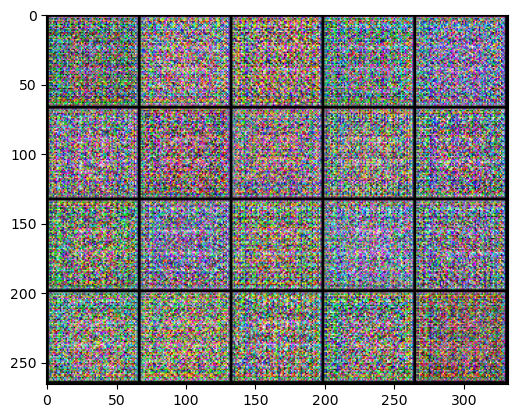

  1%|          | 9/1000 [00:12<19:49,  1.20s/it]

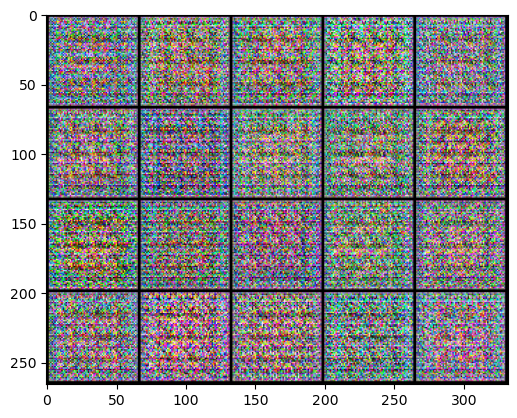

  1%|▏         | 14/1000 [00:18<19:27,  1.18s/it]

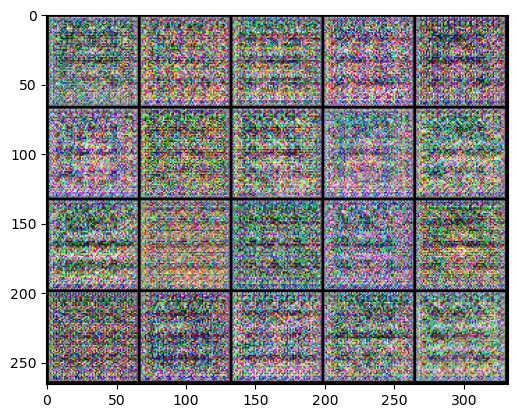

  2%|▏         | 19/1000 [00:24<19:14,  1.18s/it]

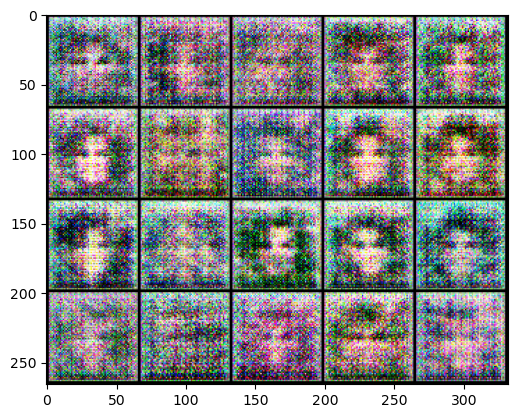

  2%|▏         | 24/1000 [00:30<19:16,  1.19s/it]

In [9]:
trainer.train(
    n_steps=1000,
    regime = (5,3),
    batch_size=batch_size,
    transform=dataset.un_normalize
    )

In [ ]:
z = torch.randn(100,latent_dim,1,1,device = "cuda")
imgs = generator(z)
imgs = torchvision.utils.make_grid(imgs.cpu(),nrow = 10).permute(1,2,0)
plt.imshow(imgs)